# **Import modules & fetch data from Open Data Melbourne**

In [1]:
import requests
import pandas as pd
import os


# define function to fetch data from website using API

def fetch_data(base_url, dataset, api_key, num_records = 99, offset = 0):
    all_records = []
    max_offset = 9900  # Maximum number of requests

    while True:
        # maximum limit check
        if offset > max_offset:
            break

        # Create API request URL
        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&api_key={api_key}'

        # Start request
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break

        # next cycle offset
        offset += num_records

    # DataFrame all data
    df = pd.DataFrame(all_records)
    return df

API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

Please enter your API key: be95dc3bb26fd856f52d6bf1aaf777b2068541652c5da2dc57c3c431


# **Dataset:** Development activity monitor

## Load dataset

In [2]:
# get data
DEV_ACTIVITY = 'development-activity-monitor'

df_development = fetch_data(BASE_URL, DEV_ACTIVITY, API_KEY)

df_development.head()

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000479,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,None,None,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,Pre May 16,X000459,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,None,None,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,Pre May 16,X000573,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,None,None,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,Pre May 16,X000563,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,None,None,...,0,0,0,0,0,28,0,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,Pre May 16,X000997,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,None,None,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


In [3]:
df_development.isna().sum()

data_format                       0
development_key                   0
status                            0
year_completed                  377
clue_small_area                   0
clue_block                        0
street_address                    0
property_id                       0
property_id_2                  1239
property_id_3                  1367
property_id_4                  1393
property_id_5                  1404
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                  

## Data cleaning

### Fill 'property_id_5' and remove unwanted columns

In [5]:
# save as a new dataset to preserve the original data

df_dev_filled = df_development.copy()

# fill 'property_id_5' with values from 'property_id_4', then 'property_id_3', then 'property_id_2', then 'property_id'

df_dev_filled['property_id_5'] = df_dev_filled['property_id_5'].fillna(df_dev_filled['property_id_4']).fillna(df_dev_filled['property_id_3']).fillna(df_dev_filled['property_id_2']).fillna(df_dev_filled['property_id'])

# drop 'property_id_4' to 'property_id', and other unwanted columns

df_dev_filled.drop(['property_id_4', 'property_id_3', 'property_id_2', 'property_id', 'data_format', 'development_key', 'town_planning_application'], axis = 1, inplace = True)

len(df_dev_filled)

1407

In [6]:
df_dev_filled.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id_5,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,...,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,geopoint
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,2,17,0,0,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,3,12,0,0,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,4,3,0,0,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,3,28,0,17,...,0,0,0,0,0,0,28,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,2,0,0,0,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


In [7]:
df_dev_filled.isna().sum()

status                           0
year_completed                 377
clue_small_area                  0
clue_block                       0
street_address                   0
property_id_5                    0
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0
office_flr                       0
retail_flr                       0
industrial_flr                   0
storage_flr                      0
education_flr                    0
hospital_flr                     0
recreation_flr                   0
publicdispaly_flr   

In [8]:
# rename 'property_id_5'
df_dev_filled.rename(columns = {'property_id_5': 'property_id'}, inplace = True)

# check the dataframe
df_dev_filled.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,...,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,geopoint
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,2,17,0,0,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,3,12,0,0,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,4,3,0,0,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,3,28,0,17,...,0,0,0,0,0,0,28,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,2,0,0,0,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


### Fix duplicated value in 'property_id_5' if any

In [9]:
# identify duplicates in 'property_id' if any
dup = df_dev_filled[df_dev_filled.duplicated(subset = 'property_id', keep = False)]

# sort these duplicates by 'property_id' and then by 'year_completed' in descending order
dup_sorted = dup.sort_values(by = ['property_id', 'year_completed'], ascending = [True, False])

# display rows where 'property_id' has duplicates
print(dup_sorted)

len(dup_sorted)

         status year_completed               clue_small_area  clue_block  \
1383  COMPLETED           2023  West Melbourne (Residential)         412   
1384  COMPLETED           2023  West Melbourne (Residential)         412   
307   COMPLETED           2019  West Melbourne (Residential)         444   
774   COMPLETED           2019  West Melbourne (Residential)         444   
435    APPROVED           None  West Melbourne (Residential)         111   
...         ...            ...                           ...         ...   
1176  COMPLETED           2017  West Melbourne (Residential)         440   
343   COMPLETED           2023               Melbourne (CBD)          88   
1280  COMPLETED           2023               Melbourne (CBD)          88   
1273  COMPLETED           2023               Melbourne (CBD)          71   
1274  COMPLETED           2023               Melbourne (CBD)          71   

                                       street_address property_id  \
1383  17-37 Abbots

373

In [10]:
# drop duplicates and those are under construnction
# keeping the first (which has the latest year) if years are different

df_dev_clean = df_dev_filled.drop(dup_sorted[dup_sorted.duplicated(subset = 'property_id', keep = 'first')].index)

print(df_dev_clean)

                  status year_completed               clue_small_area  \
0              COMPLETED           2006               North Melbourne   
1              COMPLETED           2005               North Melbourne   
2              COMPLETED           2013  West Melbourne (Residential)   
3              COMPLETED           2014  West Melbourne (Residential)   
4              COMPLETED           2007               North Melbourne   
...                  ...            ...                           ...   
1402  UNDER CONSTRUCTION           None                       Carlton   
1403  UNDER CONSTRUCTION           None                East Melbourne   
1404  UNDER CONSTRUCTION           None                     Southbank   
1405  UNDER CONSTRUCTION           None                East Melbourne   
1406  UNDER CONSTRUCTION           None               North Melbourne   

      clue_block                                     street_address  \
0            342  191-201 Abbotsford Street NORTH ME

In [11]:
## double check if there still have duplicated values in 'property_id'

dup_2 = df_dev_clean[df_dev_clean.duplicated(subset = 'property_id', keep = False)]

In [12]:
print(dup_2)

len(dup_2)

Empty DataFrame
Columns: [status, year_completed, clue_small_area, clue_block, street_address, property_id, floors_above, resi_dwellings, studio_dwe, one_bdrm_dwe, two_bdrm_dwe, three_bdrm_dwe, student_apartments, student_beds, student_accommodation_units, institutional_accom_beds, hotel_rooms, serviced_apartments, hotels_serviced_apartments, hostel_beds, childcare_places, office_flr, retail_flr, industrial_flr, storage_flr, education_flr, hospital_flr, recreation_flr, publicdispaly_flr, community_flr, car_spaces, bike_spaces, longitude, latitude, geopoint]
Index: []

[0 rows x 35 columns]


0

In [13]:
df_dev_clean.isna().sum()

status                           0
year_completed                 268
clue_small_area                  0
clue_block                       0
street_address                   0
property_id                      0
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0
office_flr                       0
retail_flr                       0
industrial_flr                   0
storage_flr                      0
education_flr                    0
hospital_flr                     0
recreation_flr                   0
publicdispaly_flr   

# **Dataset:** Residential dwellings

## Load dataset

In [14]:
# get data
RES_DWELLINGS = 'residential-dwellings'

df_residential = fetch_data(BASE_URL, RES_DWELLINGS, API_KEY)

df_residential.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2017,355,107908,107908,463 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.952007,-37.803558,"{'lon': 144.95200710155, 'lat': -37.8035582919..."
1,2017,355,107910,107910,467 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951877,-37.803541,"{'lon': 144.95187690720002, 'lat': -37.8035406..."
2,2017,355,107913,107913,477 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951609,-37.803527,"{'lon': 144.95160858014998, 'lat': -37.8035273..."
3,2017,355,107914,107914,479 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951550,-37.803521,"{'lon': 144.95154960515, 'lat': -37.8035207254..."
4,2017,355,107915,107915,481 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951488,-37.803514,"{'lon': 144.95148784765, 'lat': -37.8035138005..."


In [15]:
df_residential.isna().sum()   # check if there are nulls

census_year          0
block_id             0
property_id          0
base_property_id     0
building_address     0
clue_small_area      0
dwelling_type        0
dwelling_number      0
longitude           36
latitude            36
location            36
dtype: int64

In [16]:
len(df_residential)

9999

## Data cleaning

In [17]:
# drop 'base_property_id'
df_res_dropped = df_residential.drop(['base_property_id'], axis = 1)

df_res_dropped.head()

,census_year,block_id,property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2017,355,107908,463 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.952007,-37.803558,"{'lon': 144.95200710155, 'lat': -37.8035582919..."
1,2017,355,107910,467 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951877,-37.803541,"{'lon': 144.95187690720002, 'lat': -37.8035406..."
2,2017,355,107913,477 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951609,-37.803527,"{'lon': 144.95160858014998, 'lat': -37.8035273..."
3,2017,355,107914,479 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951550,-37.803521,"{'lon': 144.95154960515, 'lat': -37.8035207254..."
4,2017,355,107915,481 Queensberry Street NORTH MELBOURNE 3051,North Melbourne,House/Townhouse,1,144.951488,-37.803514,"{'lon': 144.95148784765, 'lat': -37.8035138005..."


In [18]:
# duplicate ID checking on 'property_id'
# if any, keep row with the latest year

# sort dataframe by 'property_id' then 'census_year' (latest year first for each group of 'property_id')
df_res_sorted = df_res_dropped.sort_values(by = ['property_id', 'census_year'], ascending = [True, False])

# drop duplicates in 'property_id', keeping only the row with the latest year in 'census_year'
df_res_cleaned = df_res_sorted.drop_duplicates(subset = 'property_id', keep = 'first')

print(df_res_cleaned)

     census_year  block_id property_id  \
5995        2006       528           1   
3574        2019       411      100001   
9636        2003       413      100004   
5245        2006       342      100011   
4660        2019       342      100014   
...          ...       ...         ...   
3221        2019       346      681458   
1766        2018      2531      681562   
3949        2019       527      681850   
3170        2019      1108      688500   
4671        2019       342      690277   

                                    building_address  \
5995          23-25 Wakefield Street KENSINGTON 3031   
3574      1-13 Abbotsford Street WEST MELBOURNE 3003   
9636     51-57 Abbotsford Street WEST MELBOURNE 3003   
5245  151-153 Abbotsford Street NORTH MELBOURNE 3051   
4660  163-165 Abbotsford Street NORTH MELBOURNE 3051   
...                                              ...   
3221          17 Purcell Street NORTH MELBOURNE 3051   
1766            17 Nottingham Street KENSINGTON

In [19]:
df_res_cleaned.isna().sum()

census_year          0
block_id             0
property_id          0
building_address     0
clue_small_area      0
dwelling_type        0
dwelling_number      0
longitude           18
latitude            18
location            18
dtype: int64

# **Dataset:** Building information

## Load dataset

In [20]:
# get data
BUILDING_INFO = 'buildings-with-name-age-size-accessibility-and-bicycle-facilities'

df_bldg_info = fetch_data(BASE_URL, BUILDING_INFO, API_KEY)

df_bldg_info.head()

,census_year,block_id,property_id,base_property_id,building_name,street_address,clue_small_area,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers,longitude,latitude,location
0,2003,608,104285,104285,None,84 George Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987521,-37.815299,"{'lon': 144.9875211528448, 'lat': -37.81529934..."
1,2003,608,104287,104287,None,80 George Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987677,-37.815316,"{'lon': 144.98767742034823, 'lat': -37.8153163..."
2,2003,608,104947,104947,None,81-83 Hotham Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987589,-37.814577,"{'lon': 144.98758896457355, 'lat': -37.8145774..."
3,2003,608,104948,104948,None,87 Hotham Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987486,-37.814572,"{'lon': 144.9874861960862, 'lat': -37.81457155..."
4,2003,608,104949,104949,None,89 Hotham Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,Residential Apartment,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987408,-37.814593,"{'lon': 144.98740820504202, 'lat': -37.8145933..."


In [21]:
df_bldg_info.isna().sum()   # check if there are nulls

census_year                          0
block_id                             0
property_id                          0
base_property_id                     0
building_name                     7874
street_address                       0
clue_small_area                      0
construction_year                 4487
refurbished_year                  8574
number_of_floors_above_ground        6
predominant_space_use                0
accessibility_type                1194
accessibility_type_description    1194
accessibility_rating              1194
bicycle_spaces                    6882
has_showers                       9999
longitude                          642
latitude                           642
location                           642
dtype: int64

In [22]:
len(df_bldg_info)

9999

## Data cleaning

In [23]:
# drop 'base_property_id' for 'df_bldg_info' dataset
df_bldg_dropped = df_bldg_info.drop(['base_property_id', 'building_name'], axis = 1)

df_bldg_dropped.head()

,census_year,block_id,property_id,street_address,clue_small_area,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers,longitude,latitude,location
0,2003,608,104285,84 George Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987521,-37.815299,"{'lon': 144.9875211528448, 'lat': -37.81529934..."
1,2003,608,104287,80 George Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987677,-37.815316,"{'lon': 144.98767742034823, 'lat': -37.8153163..."
2,2003,608,104947,81-83 Hotham Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987589,-37.814577,"{'lon': 144.98758896457355, 'lat': -37.8145774..."
3,2003,608,104948,87 Hotham Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987486,-37.814572,"{'lon': 144.9874861960862, 'lat': -37.81457155..."
4,2003,608,104949,89 Hotham Street EAST MELBOURNE 3002,East Melbourne,None,None,2.0,Residential Apartment,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.987408,-37.814593,"{'lon': 144.98740820504202, 'lat': -37.8145933..."


In [24]:
# duplicate ID checking on 'property_id'
# if any, keep row with the latest year

# sort dataframe by 'property_id' then 'census_year' (latest year first for each group of 'property_id')
df_bldg_sorted = df_bldg_dropped.sort_values(by = ['property_id', 'census_year'], ascending = [True, False])

# drop duplicates in 'property_id', keeping only the row with the latest year in 'census_year'
df_bldg_cleaned = df_bldg_sorted.drop_duplicates(subset = 'property_id', keep = 'first')

print(df_bldg_cleaned)

     census_year  block_id property_id  \
6362        2017       411      100001   
2863        2004       412      100002   
6363        2017       413      100003   
6364        2017       413      100004   
5838        2017       342      100009   
...          ...       ...         ...   
8609        2017      2525      671649   
8610        2017      2525      671650   
7571        2017       736      680223   
8659        2017      2531      681561   
6881        2017       527      681850   

                                      street_address  \
6362      1-13 Abbotsford Street WEST MELBOURNE 3003   
2863     17-37 Abbotsford Street WEST MELBOURNE 3003   
6363     39-49 Abbotsford Street WEST MELBOURNE 3003   
6364     51-57 Abbotsford Street WEST MELBOURNE 3003   
5838  135-141 Abbotsford Street NORTH MELBOURNE 3051   
...                                              ...   
8609             81A Eastwood Street KENSINGTON 3031   
8610              83 Eastwood Street KENSINGTON

In [25]:
df_bldg_cleaned.isna().sum()

census_year                          0
block_id                             0
property_id                          0
street_address                       0
clue_small_area                      0
construction_year                 3617
refurbished_year                  6879
number_of_floors_above_ground        5
predominant_space_use                0
accessibility_type                 940
accessibility_type_description     940
accessibility_rating               940
bicycle_spaces                    5204
has_showers                       7968
longitude                          426
latitude                           426
location                           426
dtype: int64

# **Merging**

### Merge 'Development activity monitor' and 'Residential dwellings'

In [26]:
list(df_dev_clean)

['status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'floors_above',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'longitude',
 'latitude',
 'geopoint']

In [27]:
list(df_res_cleaned)

['census_year',
 'block_id',
 'property_id',
 'building_address',
 'clue_small_area',
 'dwelling_type',
 'dwelling_number',
 'longitude',
 'latitude',
 'location']

In [31]:
## skip duplicated columns while merging:
## 'block_id', 'clue_small_area', 'street_address', 'longitude', 'latitude' and 'geopoint'

## dev_exclude = ['street_address', 'longitude', 'latitude', 'geopoint']
## df_dev_selected = df_dev_clean.drop(dev_exclude, axis = 1)

## df_res_selected = df_res_cleaned[['census_year', 'property_id', 'building_address', 'dwelling_type', 'dwelling_number', 'longitude', 'latitude', 'location']]

## ---

df_res_selected = df_res_cleaned[['census_year', 'property_id', 'dwelling_type', 'dwelling_number']]

In [32]:
# inner join

inner_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'inner')

len(inner_dev_res)

252

In [33]:
# outer join

outer_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'outer')

len(outer_dev_res)

7642

In [34]:
# right join

right_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'right')

len(right_dev_res)

6719

In [35]:
# left join

left_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'left')
len(left_dev_res)

1175

In [36]:
list(left_dev_res.columns)

['status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'floors_above',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'longitude',
 'latitude',
 'geopoint',
 'census_year',
 'dwelling_type',
 'dwelling_number']

In [37]:
left_dev_res.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,...,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,geopoint,census_year,dwelling_type,dwelling_number
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,2,17,0,0,...,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}",NaN,NaN,NaN
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,3,12,0,0,...,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}",2019,Residential Apartments,12.0
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,4,3,0,0,...,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}",2019,Residential Apartments,3.0
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,3,28,0,17,...,0,0,0,28,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}",NaN,NaN,NaN
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,2,0,0,0,...,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}",NaN,NaN,NaN


In [38]:
left_dev_res.isna().sum()

status                           0
year_completed                 268
clue_small_area                  0
clue_block                       0
street_address                   0
property_id                      0
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0
office_flr                       0
retail_flr                       0
industrial_flr                   0
storage_flr                      0
education_flr                    0
hospital_flr                     0
recreation_flr                   0
publicdispaly_flr   

### Merge 'Development & Residential' with 'Building information'

In [39]:
list(df_bldg_cleaned)

['census_year',
 'block_id',
 'property_id',
 'street_address',
 'clue_small_area',
 'construction_year',
 'refurbished_year',
 'number_of_floors_above_ground',
 'predominant_space_use',
 'accessibility_type',
 'accessibility_type_description',
 'accessibility_rating',
 'bicycle_spaces',
 'has_showers',
 'longitude',
 'latitude',
 'location']

In [40]:
# skip column 'floors_above' from dataframe 'left_dev_res'

dev_res_exclude = ['floors_above']
left_dev_res = left_dev_res.drop(dev_res_exclude, axis = 1)

# skip columns from 'df_bldg_cleaned':
# 'census_year', 'block_id', 'street_address', 'clue_small_area', 'longitude', 'latitude' and 'location'

bldg_exclude = ['census_year', 'block_id', 'street_address', 'clue_small_area', 'longitude', 'latitude', 'location']
df_bldg_selected = df_bldg_cleaned.drop(bldg_exclude, axis = 1)

In [41]:
# left join

left_dev_res_bldg = pd.merge(left_dev_res, df_bldg_selected, on = 'property_id', how = 'left')

len(left_dev_res_bldg)

1175

In [42]:
list(left_dev_res_bldg.columns)

['status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'longitude',
 'latitude',
 'geopoint',
 'census_year',
 'dwelling_type',
 'dwelling_number',
 'construction_year',
 'refurbished_year',
 'number_of_floors_above_ground',
 'predominant_space_use',
 'accessibility_type',
 'accessibility_type_description',
 'accessibility_rating',
 'bicycle_spaces',
 'has_showers']

In [43]:
left_dev_res_bldg.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,...,dwelling_number,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,17,0,0,0,...,NaN,1890,None,2.0,Residential Apartment,Moderate level of accessibility,Main entrance has steps; Alternative entrance ...,2,0.0,None
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,12,0,0,0,...,12.0,2005,None,3.0,Residential Apartment,Low level of accessibility,All entrances have steps,1,0.0,None
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,3,0,0,0,...,3.0,1970,None,1.0,Wholesale,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,28,0,17,11,...,NaN,1888,2014,5.0,Residential Apartment,Not determined or not applicable,Configuration of entrance does not fit into an...,0,28.0,None
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
left_dev_res_bldg.isna().sum()   # check if there are nulls

status                               0
year_completed                     268
clue_small_area                      0
clue_block                           0
street_address                       0
property_id                          0
resi_dwellings                       0
studio_dwe                           0
one_bdrm_dwe                         0
two_bdrm_dwe                         0
three_bdrm_dwe                       0
student_apartments                   0
student_beds                         0
student_accommodation_units          0
institutional_accom_beds             0
hotel_rooms                          0
serviced_apartments                  0
hotels_serviced_apartments           0
hostel_beds                          0
childcare_places                     0
office_flr                           0
retail_flr                           0
industrial_flr                       0
storage_flr                          0
education_flr                        0
hospital_flr             

# **Observations**

In [45]:
# from google.colab import files

# left_dev_res_bldg.to_csv('df.csv')
# files.download('df.csv')

## CUBE Small Area Trends in Building and Space Constructions

**Aggregation calculation**

In [46]:
# total number of buildings / spaces labelled as 'completed', group by CLUE small area

completed_bldg = left_dev_res_bldg[left_dev_res_bldg['status'] == 'COMPLETED']

selected = ['resi_dwellings', 'student_apartments', 'hotels_serviced_apartments', 'childcare_places', 'car_spaces', 'bike_spaces', 'bicycle_spaces']

grouped_CLUE = completed_bldg.groupby(['clue_small_area', 'year_completed'])[selected].sum(numeric_only = True)

grouped_CLUE

resi_dwellings  \
clue_small_area              year_completed                   
Carlton                      2002                        47   
                             2003                       534   
                             2004                        58   
                             2005                        45   
                             2006                        57   
...                                                     ...   
West Melbourne (Residential) 2019                       607   
                             2020                        27   
                             2021                       144   
                             2022                       145   
                             2023                       493   

                                             student_apartments  \
clue_small_area              year_completed                       
Carlton                      2002                             0   
                             2003                           220   
                             2004                             0   
                             2005                           349   
                             2006                           253   
...                                                         ...   
West Melbourne (Residential) 2019                             0   
                             2020                             0   
                             2021                             0   
                             2022                           308   
                             2023                             0   

                                             hotels_serviced_apartments  \
clue_small_area              year_completed                               
Carlton                      2002                                     0   
                             2003                                     0   
                             2004                                     0   
                             2005                                     0   
                             2006                                     0   
...                                                                 ...   
West Melbourne (Residential) 2019                                     0   
                             2020                                     0   
                             2021                                     0   
                             2022                                   150   
                             2023                                    44   

                                             childcare_places  car_spaces  \
clue_small_area              year_completed                                 
Carlton                      2002                           0           0   
                             2003                           0           0   
                             2004                           0           0   
                             2005                           0           0   
                             2006                           0           0   
...                                                       ...         ...   
West Melbourne (Residential) 2019                           0         368   
                             2020                           0          39   
                             2021                           0          30   
                             2022                           0         224   
                             2023                           0         327   

                                             bike_spaces  bicycle_spaces  
clue_small_area              year_completed                               
Carlton                      2002                      0             0.0  
                             2003                      0            25.0  
                             2004                      0             0.0  


In [47]:
# sum across the rows to get the total sum of the selected columns for each clue_small_area and completed year
grouped_CLUE['total'] = grouped_CLUE.sum(axis = 1)

# reset the index to have `clue_small_area` and `year_completed` as columns
grouped_reset = grouped_CLUE.reset_index()

# select only `clue_small_area` and `year_completed`, and `total` columns for final output
year_bldg_sum = grouped_reset[['clue_small_area', 'year_completed', 'total']]

year_bldg_sum

,clue_small_area,year_completed,total
0,Carlton,2002,47.0
1,Carlton,2003,779.0
2,Carlton,2004,58.0
3,Carlton,2005,433.0
4,Carlton,2006,310.0
...,...,...,...
210,West Melbourne (Residential),2019,1327.0
211,West Melbourne (Residential),2020,77.0
212,West Melbourne (Residential),2021,200.0
213,West Melbourne (Residential),2022,1026.0


### Bar Chart

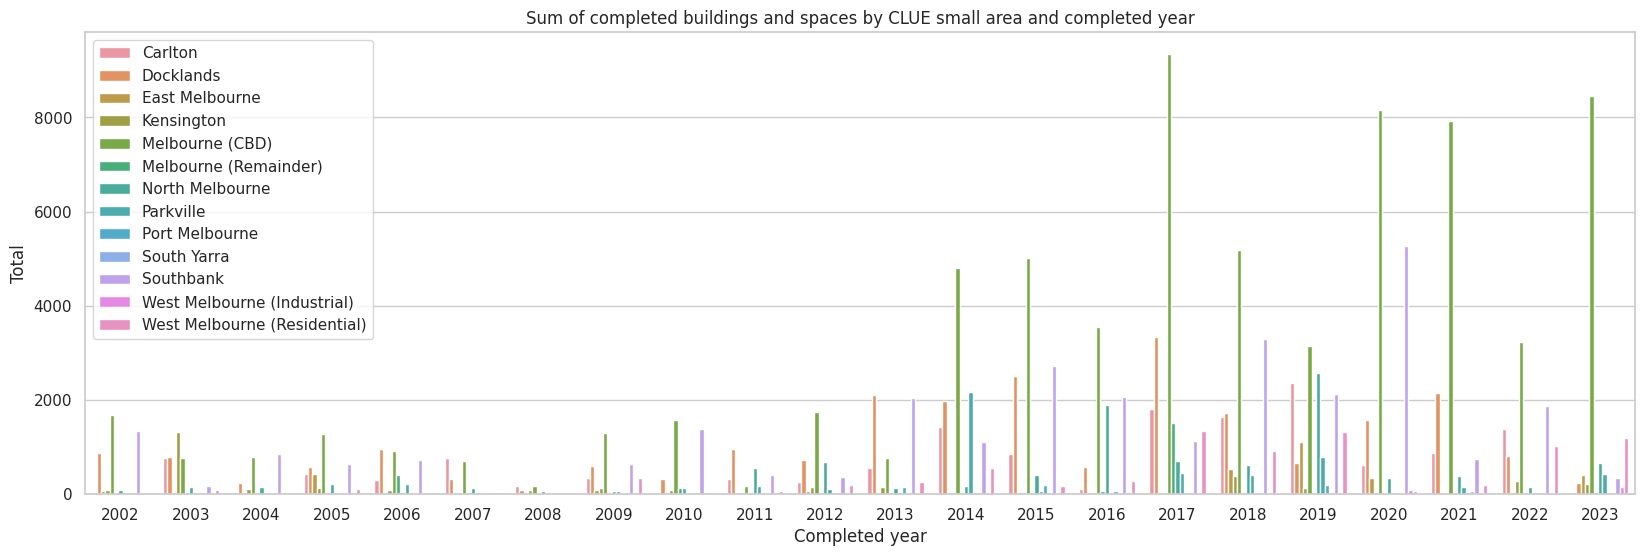

In [48]:
# draw the bar chart

import matplotlib.pyplot as plt
import seaborn as sns

# set style of seaborn
sns.set(style = "whitegrid")

# create a bar plot
plt.figure(figsize = (20, 6))
barplot = sns.barplot(x = 'year_completed', y = 'total', hue = 'clue_small_area', data = year_bldg_sum)

# Set the plot title and labels
plt.title('Sum of completed buildings and spaces by CLUE small area and completed year')
plt.xlabel('Completed year')
plt.ylabel('Total')
plt.legend(loc = 'upper left')

# Display the plot
plt.show()

**Interactive Bar Chart**

In [99]:
!pip install plotly

import plotly.express as px

# interactive bar plot
fig_barChart = px.bar(year_bldg_sum, x = 'year_completed', y = 'total', color = 'clue_small_area',
                      title = 'Sum of completed buildings and spaces by CLUE small area and completed year',
                      labels = {'total': 'Total', 'year': 'Year', 'clue_small_area': 'CLUE small area'})

fig_barChart.update_layout(
    legend = dict(
        yanchor = "top",
        y = 1,
        xanchor = "left",
        x = 0
        ),
    barmode = 'group',
    xaxis_tickangle = -45
    )

# show the plot
fig_barChart.show()

### Heat map

In [100]:
# get CLUE small area data
SMALL_AREA_FOR_CLUE = 'small-areas-for-census-of-land-use-and-employment-clue'

df_sm_area_for_CLUE = fetch_data(BASE_URL, SMALL_AREA_FOR_CLUE, API_KEY)

df_sm_area_for_CLUE

,geo_point_2d,geo_shape,featurenam,shape_area,shape_len
0,"{'lon': 144.9221537804208, 'lat': -37.80962130...","{'type': 'Feature', 'geometry': {'coordinates'...",West Melbourne (Industrial),5917883.21599,11793.960449
1,"{'lon': 144.9416850851487, 'lat': -37.81851829...","{'type': 'Feature', 'geometry': {'coordinates'...",Docklands,2856028.73238,9588.24778517
2,"{'lon': 144.966376105915, 'lat': -37.796011677...","{'type': 'Feature', 'geometry': {'coordinates'...",Carlton,2724820.83121,9914.977304
3,"{'lon': 144.94506274103145, 'lat': -37.7984489...","{'type': 'Feature', 'geometry': {'coordinates'...",North Melbourne,2408377.21789,7546.64919141
4,"{'lon': 144.91223395712774, 'lat': -37.8318317...","{'type': 'Feature', 'geometry': {'coordinates'...",Port Melbourne,5470092.78821,15117.7233976
5,"{'lon': 144.9515603312268, 'lat': -37.78711656...","{'type': 'Feature', 'geometry': {'coordinates'...",Parkville,4050997.2362,9224.56939673
6,"{'lon': 144.96176162794978, 'lat': -37.8252901...","{'type': 'Feature', 'geometry': {'coordinates'...",Southbank,1596010.33174,6012.37723915
7,"{'lon': 144.98292521995853, 'lat': -37.8376070...","{'type': 'Feature', 'geometry': {'coordinates'...",South Yarra,1057773.39715,5424.13644582
8,"{'lon': 144.9825008488323, 'lat': -37.81458116...","{'type': 'Feature', 'geometry': {'coordinates'...",East Melbourne,1909072.65637,6557.91424946
9,"{'lon': 144.9204996881507, 'lat': -37.79152998...","{'type': 'Feature', 'geometry': {'coordinates'...",Kensington,3808797.49677,9407.05542058


In [101]:
!pip install qeds

import geopandas as gpd
import qeds

# from shapely.geometry import Point
from shapely.geometry import MultiPolygon


# try applying qeds style if it exists
try:
    qeds.themes.mpl_style();
except:
    # if qeds style does not work, use a default matplotlib style
    plt.style.use('seaborn')

%matplotlib inline

<ipython-input-101-326a9800e16e>:15: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [102]:
# defiine function to transform the data into a multipolygon
def create_multipolygon(row):

    # extract coordinates from row
    coordinates = row['geometry']['coordinates']

    # create a multipolygon object
    return MultiPolygon(coordinates)

# apply function to each row in the dataframe
df_sm_area_for_CLUE["geometry"] = df_sm_area_for_CLUE["geo_shape"].apply(create_multipolygon)

# Create a GeoDataFrame
gdf_shapes = gpd.GeoDataFrame(df_sm_area_for_CLUE, geometry = 'geometry')

# Display the head of the GeoDataFrame
gdf_shapes.head()

,geo_point_2d,geo_shape,featurenam,shape_area,shape_len,geometry
0,"{'lon': 144.9221537804208, 'lat': -37.80962130...","{'type': 'Feature', 'geometry': {'coordinates'...",West Melbourne (Industrial),5917883.21599,11793.960449,"MULTIPOLYGON (((144.91999 -37.81910, 144.91960..."
1,"{'lon': 144.9416850851487, 'lat': -37.81851829...","{'type': 'Feature', 'geometry': {'coordinates'...",Docklands,2856028.73238,9588.24778517,"MULTIPOLYGON (((144.95144 -37.81317, 144.95190..."
2,"{'lon': 144.966376105915, 'lat': -37.796011677...","{'type': 'Feature', 'geometry': {'coordinates'...",Carlton,2724820.83121,9914.977304,"MULTIPOLYGON (((144.97322 -37.80776, 144.97129..."
3,"{'lon': 144.94506274103145, 'lat': -37.7984489...","{'type': 'Feature', 'geometry': {'coordinates'...",North Melbourne,2408377.21789,7546.64919141,"MULTIPOLYGON (((144.95732 -37.80155, 144.95745..."
4,"{'lon': 144.91223395712774, 'lat': -37.8318317...","{'type': 'Feature', 'geometry': {'coordinates'...",Port Melbourne,5470092.78821,15117.7233976,"MULTIPOLYGON (((144.90606 -37.82224, 144.91010..."


**Map of CLUE small area**

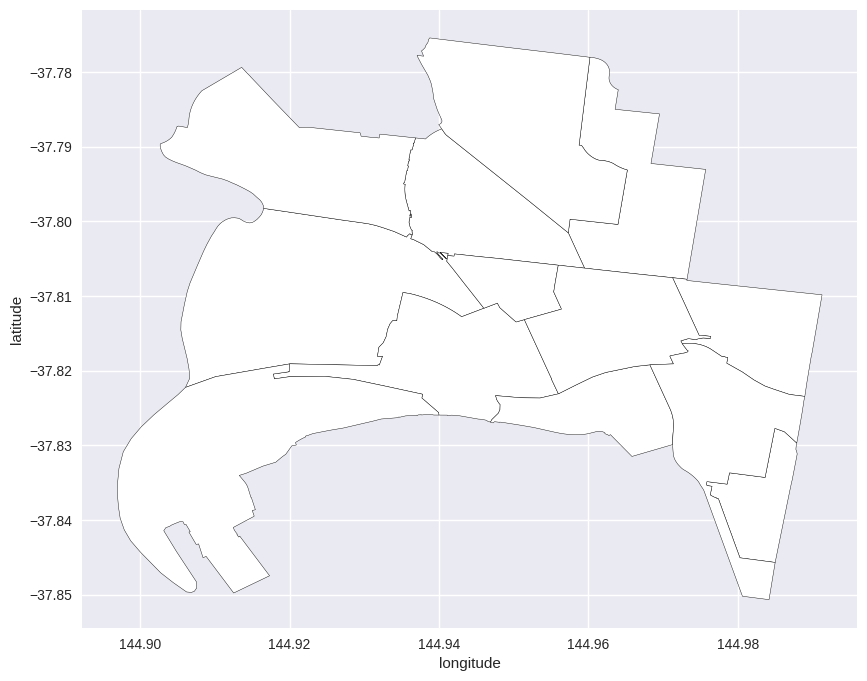

In [103]:
fig_CLUE, gax = plt.subplots(figsize = (10, 10))

# plotting the polygons
gdf_shapes.plot(ax = gax, edgecolor = 'black', color = 'white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [104]:
# sum of each type of buildings / spaces for each CLUE area across all years

CLUE_bldg_totals = completed_bldg.groupby(['clue_small_area'])[selected].sum()

CLUE_bldg_totals['total'] = CLUE_bldg_totals.sum(axis = 1)

CLUE_bldg_totals

,resi_dwellings,student_apartments,hotels_serviced_apartments,childcare_places,car_spaces,bike_spaces,bicycle_spaces,total
clue_small_area,,,,,,,,
Carlton,4826,5547,262,168,1122,2646,627.0,15198.0
Docklands,8657,0,1269,460,7583,4444,1721.0,24134.0
East Melbourne,1073,0,13,0,1567,523,36.0,3212.0
Kensington,2684,0,0,100,446,290,20.0,3540.0
Melbourne (CBD),27301,6271,7864,576,13470,12553,2636.0,70671.0
Melbourne (Remainder),1047,0,100,0,698,284,12.0,2141.0
North Melbourne,3650,1268,92,280,2929,2101,61.0,10381.0
Parkville,1115,606,0,116,671,799,1903.0,5210.0
Port Melbourne,1,0,0,0,804,44,5.0,854.0


In [105]:
# add the 'total' data from 'CLUE_bldg_totals' dataframe

gdf_shapes = gdf_shapes.merge(CLUE_bldg_totals['total'], left_on = 'featurenam', right_index = True)

gdf_shapes

,geo_point_2d,geo_shape,featurenam,shape_area,shape_len,geometry,total
0,"{'lon': 144.9221537804208, 'lat': -37.80962130...","{'type': 'Feature', 'geometry': {'coordinates'...",West Melbourne (Industrial),5917883.21599,11793.960449,"MULTIPOLYGON (((144.91999 -37.81910, 144.91960...",300.0
1,"{'lon': 144.9416850851487, 'lat': -37.81851829...","{'type': 'Feature', 'geometry': {'coordinates'...",Docklands,2856028.73238,9588.24778517,"MULTIPOLYGON (((144.95144 -37.81317, 144.95190...",24134.0
2,"{'lon': 144.966376105915, 'lat': -37.796011677...","{'type': 'Feature', 'geometry': {'coordinates'...",Carlton,2724820.83121,9914.977304,"MULTIPOLYGON (((144.97322 -37.80776, 144.97129...",15198.0
3,"{'lon': 144.94506274103145, 'lat': -37.7984489...","{'type': 'Feature', 'geometry': {'coordinates'...",North Melbourne,2408377.21789,7546.64919141,"MULTIPOLYGON (((144.95732 -37.80155, 144.95745...",10381.0
4,"{'lon': 144.91223395712774, 'lat': -37.8318317...","{'type': 'Feature', 'geometry': {'coordinates'...",Port Melbourne,5470092.78821,15117.7233976,"MULTIPOLYGON (((144.90606 -37.82224, 144.91010...",854.0
5,"{'lon': 144.9515603312268, 'lat': -37.78711656...","{'type': 'Feature', 'geometry': {'coordinates'...",Parkville,4050997.2362,9224.56939673,"MULTIPOLYGON (((144.94037 -37.78762, 144.94007...",5210.0
6,"{'lon': 144.96176162794978, 'lat': -37.8252901...","{'type': 'Feature', 'geometry': {'coordinates'...",Southbank,1596010.33174,6012.37723915,"MULTIPOLYGON (((144.95600 -37.82310, 144.95808...",29311.0
7,"{'lon': 144.98292521995853, 'lat': -37.8376070...","{'type': 'Feature', 'geometry': {'coordinates'...",South Yarra,1057773.39715,5424.13644582,"MULTIPOLYGON (((144.98502 -37.84568, 144.98399...",189.0
8,"{'lon': 144.9825008488323, 'lat': -37.81458116...","{'type': 'Feature', 'geometry': {'coordinates'...",East Melbourne,1909072.65637,6557.91424946,"MULTIPOLYGON (((144.97322 -37.80776, 144.97319...",3212.0
9,"{'lon': 144.9204996881507, 'lat': -37.79152998...","{'type': 'Feature', 'geometry': {'coordinates'...",Kensington,3808797.49677,9407.05542058,"MULTIPOLYGON (((144.93687 -37.78884, 144.93667...",3540.0


**Heatmap**

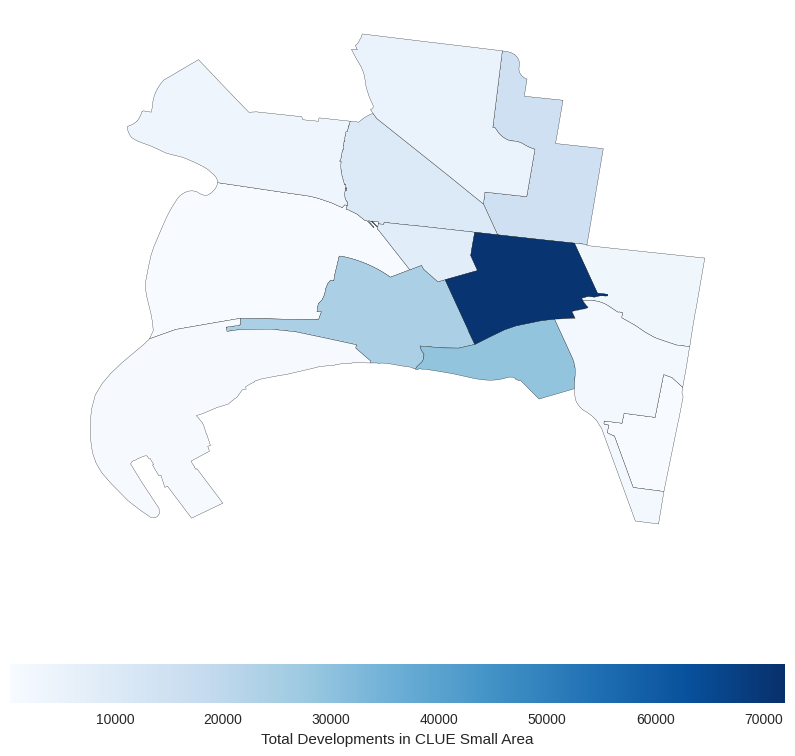

In [106]:
fig_heatmap, ax = plt.subplots(1, 1, figsize = (10, 10))
gdf_shapes.plot(column = 'total', ax = ax, legend = True, cmap = 'Blues', vmin = 300, vmax = 72000,
                legend_kwds = {
                    'label': "Total Developments in CLUE Small Area",
                    'orientation': "horizontal"
                    },
                linewidth = 0.2,
                edgecolor = 'black')

# Remove axis off
ax.set_axis_off()

# Show the plot
plt.show()

**Interactive heatmap**

In [107]:
interactive_gdf_shapes = gdf_shapes.reset_index()

# convert the GeoDataFrame to GeoJSON
geojson = interactive_gdf_shapes.__geo_interface__

# create the interactive map
fig_hMap_interactive = px.choropleth(interactive_gdf_shapes,
                                   geojson = geojson,
                                   locations = interactive_gdf_shapes.index,
                                   color = 'total',
                                   hover_name = 'featurenam',
                                   color_continuous_scale = 'Blues',
                                   range_color = (300, 72000),
                                   labels = {'total': 'Total Developments in CLUE Small Area'})

# update layout to improve map presentation
fig_hMap_interactive.update_geos(fitbounds = "locations", visible = False)
fig_hMap_interactive.update_layout(margin = {"r": 0, "t": 0, "l": 0, "b": 0})

# show plot
fig_hMap_interactive.show()

## Growth Patterns in Housing Developments

**Aggregation Calculation**

In [108]:
# sum of residential dwellings (residential dwellings & student apartments) for each CLUE area across all years

grouped_CLUE_res = grouped_CLUE.groupby(['clue_small_area', 'year_completed'])[['resi_dwellings', 'student_apartments']].sum()

grouped_CLUE_res['total'] = grouped_CLUE_res.sum(axis = 1)

grouped_CLUE_res

resi_dwellings  \
clue_small_area              year_completed                   
Carlton                      2002                        47   
                             2003                       534   
                             2004                        58   
                             2005                        45   
                             2006                        57   
...                                                     ...   
West Melbourne (Residential) 2019                       607   
                             2020                        27   
                             2021                       144   
                             2022                       145   
                             2023                       493   

                                             student_apartments  total  
clue_small_area              year_completed                             
Carlton                      2002                             0     47  
                             2003                           220    754  
                             2004                             0     58  
                             2005                           349    394  
                             2006                           253    310  
...                                                         ...    ...  
West Melbourne (Residential) 2019                             0    607  
                             2020                             0     27  
                             2021                             0    144  
                             2022                           308    453  
                             2023                             0    493  

[215 rows x 3 columns]

### Line Chart

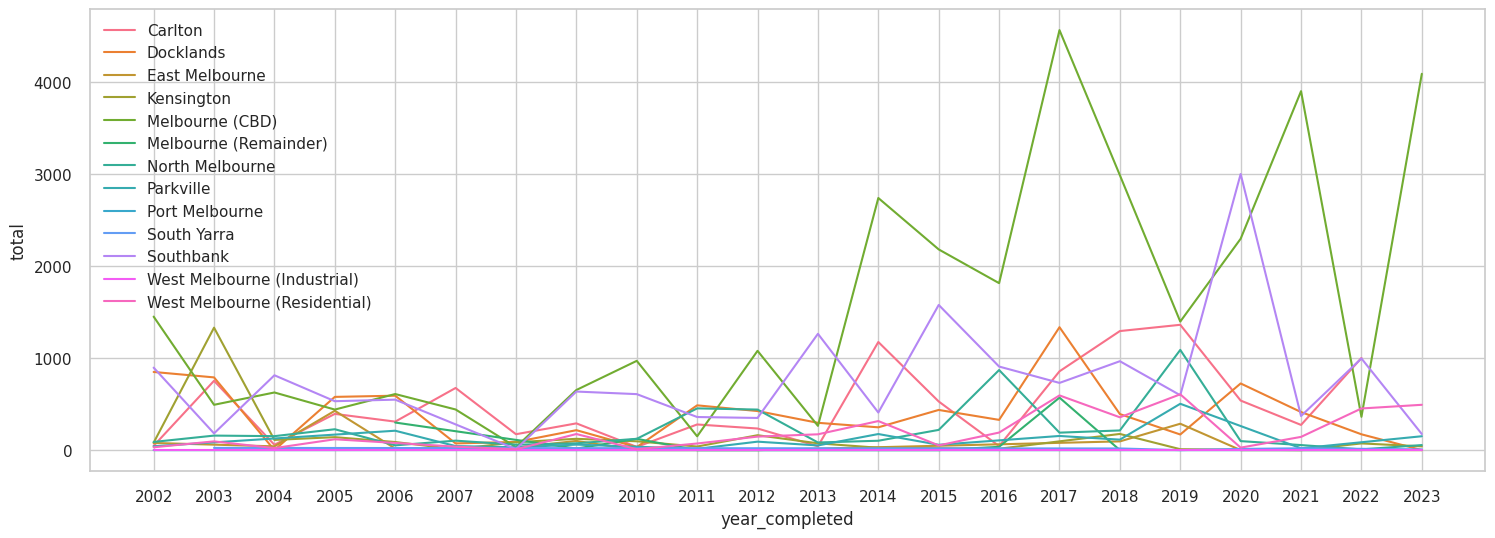

In [114]:
# create the figure and specify the size
fig_line = plt.subplots(figsize = (18, 6))

# plot the data
sns.lineplot(x = 'year_completed', y = 'total', hue = 'clue_small_area', data = grouped_CLUE_res)

# set theme
sns.set_theme(style = 'whitegrid')

# move legend
plt.legend(loc = 'upper left')

plt.show()

**Interactive Line Chart**

In [115]:
# create interactive line plot
fig_line_interactive = px.line(grouped_CLUE_res.reset_index(), x = 'year_completed', y = 'total', color = 'clue_small_area', title = 'Trends in Housing Developments Over the Years')

# improve layout
fig_line_interactive.update_layout(
    title = {
        'text': 'Trends in Housing Developments Over the Years',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    hovermode = 'closest',  # show tooltip for the closest point
    legend_title_text = 'clue_small_area'
)

# Show the plot
fig_line_interactive.show()

In [13]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [14]:
# df_dev_filled.to_csv('/content/gdrive/My Drive/Colab Notebooks/df_dev_filled.csv', index = False)